In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('homeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(df.drop('price', axis = 1))
X_scaled

array([[0.        , 0.        , 0.54545455],
       [0.26666667, 0.33333333, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.        , 1.        ],
       [0.93333333, 0.66666667, 0.        ],
       [1.        , 1.        , 0.        ]])

In [4]:
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
y_scaled

array([[0.        ],
       [0.05769231],
       [0.23076923],
       [0.17307692],
       [0.80769231],
       [1.        ]])

In [5]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    bias = 0
    n = X.shape[0]
    epoch_list = []
    cost_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + bias

        w_grad = -(3/n)*(np.dot(X.T,(y_true - y_predicted)))
        bias_grad = -(3/n)*(np.sum(y_true - y_predicted))

        w = w - learning_rate*w_grad
        bias = bias - learning_rate*bias_grad

        cost = np.mean((np.square(y_true - y_predicted)))

        if i%10 == 0:
            epoch_list.append(i)
            cost_list.append(cost) 
    return w, bias, epoch_list, cost_list, cost

w, bias, epoch_list, cost_list, cost = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],),500)
w,bias,cost
            

(array([0.53851146, 0.87529007, 0.40167306]),
 -0.3730500260014879,
 0.023397991960550184)

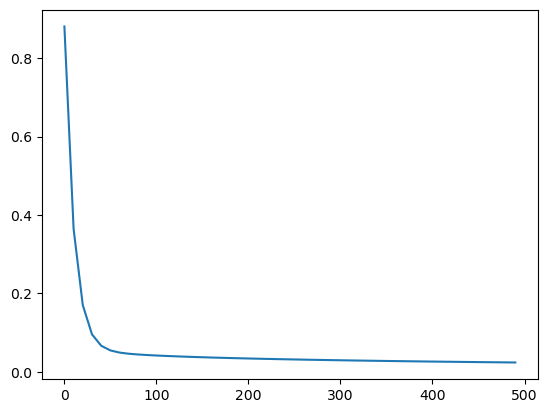

In [6]:
plt.plot(epoch_list, cost_list)
plt.show()

In [7]:
def predict(area, bedrooms, age, w, bias):
   
    scaled_x = sx.transform([[area, bedrooms, age]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + w[2]*scaled_x[2] + bias
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 3, 20, w, bias)

D:\Anaconda__\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


509971.53622813354

In [8]:
import random

In [9]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    n = X.shape[0]
    w = np.ones(shape=(number_of_features))
    b = 0
    epoch_list = []
    cost_list = []

    for i in range(epochs):
        random_index = random.randint(0,n-1)
        y_sample = y_true[random_index]
        x_sample = X[random_index]

        y_predicted = np.dot(w, x_sample.T) + b

        w_grad = -(3/n)*(x_sample.T.dot(y_sample - y_predicted))
        b_grad = -(3/n)*(y_sample - y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.square(y_sample - y_predicted)
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],), epochs = 10000)
w_sgd, b_sgd, cost_sgd

(array([0.45567787, 0.71581508, 0.11575003]),
 -0.16417609382369686,
 0.031050345143566714)

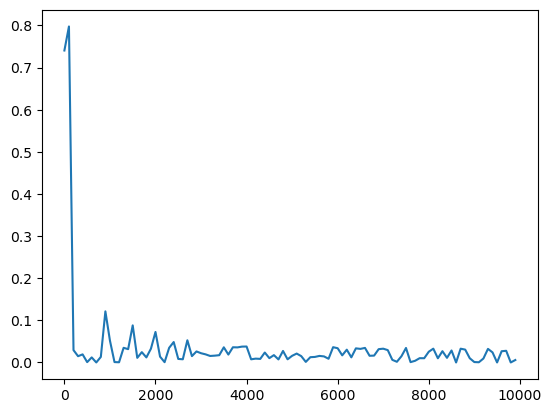

In [10]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.show()

In [43]:
predict(2600, 3, 20, w_sgd, b_sgd)

D:\Anaconda__\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


523729.6740794966

In [49]:
def mini_batch_gradient_descent(X, y, epochs, learning_rate = 0.01): 
    features = X.shape[1]
    n = X.shape[0]
    w = np.ones(shape=(features))
    b = 0
    epoch_list = []
    cost_list = []
    m = 0
    curr = 10

    for i in range(epochs):
        x_sample = X[m : min(m + curr, n)]
        y_sample = y[m : min(m + curr, n)]

        y_predicted = np.dot(w, x_sample.T) + b

        w_grad = -(2/n)*(np.dot(x_sample.T, (y_sample - y_predicted)))
        b_grad = -(2/n)*(y_sample - y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_sample - y_predicted))

        m += curr
        if m>n:
            m = 0

        if i%25 == 0:
            epoch_list.append(i)
            cost_list.append(cost)

    return w, b, cost, cost_list, epoch_list

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],),1000)
w_mbgd, b_mbgd, cost_mbgd


# def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):   
    
#     number_of_features = X.shape[1]
#     # numpy array with 1 row and columns equal to number of features. In 
#     # our case number_of_features = 3 (area, bedroom and age)
#     w = np.ones(shape=(number_of_features)) 
#     b = 0
#     total_samples = X.shape[0] # number of rows in X
    
#     if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
#         batch_size = total_samples
        
#     cost_list = []
#     epoch_list = []
    
#     num_batches = int(total_samples/batch_size)
    
#     for i in range(epochs):    
#         random_indices = np.random.permutation(total_samples)
#         X_tmp = X[random_indices]
#         y_tmp = y_true[random_indices]
        
#         for j in range(0,total_samples,batch_size):
#             Xj = X_tmp[j:j+batch_size]
#             yj = y_tmp[j:j+batch_size]
#             y_predicted = np.dot(w, Xj.T) + b
            
#             w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
#             b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
#             w = w - learning_rate * w_grad
#             b = b - learning_rate * b_grad
                
#             cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
#         if i%10==0:
#             cost_list.append(cost)
#             epoch_list.append(i)
        
#     return w, b, cost, cost_list, epoch_list

# w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
#     scaled_X,
#     scaled_y.reshape(scaled_y.shape[0],),
#     epochs = 120,
#     batch_size = 5
# )
# w, b, cost

(array([0.41020028, 0.71327879, 0.32189681]),
 array([-0.17649705, -0.38357438, -0.08358834, -0.42179098, -0.05257804,
        -0.12381106]),
 1.5003199761540395e-05)

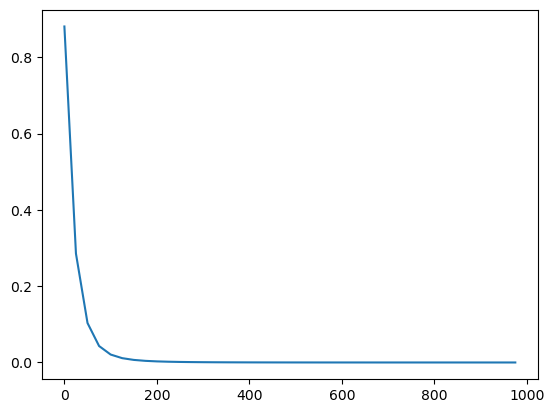

In [39]:
plt.plot(epoch_list_mbgd, cost_list_mbgd)
plt.show()

In [51]:
predict(2600, 3, 20, w_mbgd, b_mbgd)

D:\Anaconda__\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 3. None expected <= 2.